In [1]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import csv
import platform
import pandas as pd

In [3]:
#1
data=pd.read_csv("daegu-utf8-df.csv")
data

,날짜,지점,평균기온,최저기온,최고기온
0,1909-01-01,143,-4.1,-8.0,0.1
1,1909-01-02,143,-0.8,-6.7,6.1
2,1909-01-03,143,1.0,-2.4,3.6
3,1909-01-04,143,4.2,0.0,9.2
4,1909-01-05,143,3.4,-0.4,9.0
...,...,...,...,...,...
42017,2024-01-19,143,6.0,4.9,7.2
42018,2024-01-20,143,5.4,3.7,7.4
42019,2024-01-21,143,5.5,3.1,8.3
42020,2024-01-22,143,-1.5,-6.4,4.5


In [4]:
year_list=[2014+i for i in range(10)]
year_list

[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

In [5]:
data["날짜"]=pd.to_datetime(data["날짜"],format="%Y-%m-%d")
data["최저기온"]=data["최저기온"].astype("float32")
data["최고기온"]=data["최고기온"].astype("float32")
data["평균기온"]=data["평균기온"].astype("float32")

In [35]:
x=[]
year_diff=[]
for i in range(10) :
    data_filtered_year = data[data["날짜"].dt.year==year_list[i]]
    month_mean=[]
    for j in range(1,13) :
        data_filtered_month = data_filtered_year[data_filtered_year["날짜"].dt.month==j]
        month_mean.append(round(data_filtered_month["최고기온"].mean()-data_filtered_month["최저기온"].mean(),1))
    diff_sr=data_filtered_month["최고기온"]-data_filtered_month["최저기온"]
    key=str(str(2014+i)+"."+str(month_mean.index(max(month_mean))+1))
    year_diff.append((key, max(month_mean)))
print(year_diff)

[('2014.5', 12.9), ('2015.5', 12.6), ('2016.5', 13.1), ('2017.5', 13.0), ('2018.4', 12.5), ('2019.5', 14.0), ('2020.4', 12.6), ('2021.2', 11.7), ('2022.4', 13.3), ('2023.3', 13.4)]


In [36]:
x_list=[]
y_list=[]
for x,y in year_diff : 
    x_list.append(x)
    y_list.append(y)

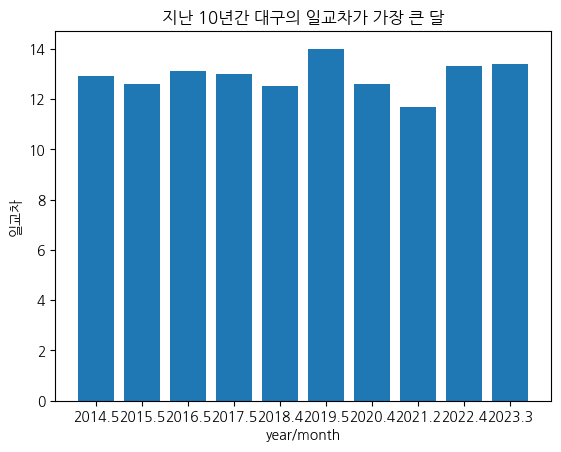

In [37]:
plt.bar(x_list,y_list)
plt.title("지난 10년간 대구의 일교차가 가장 큰 달")
plt.xlabel("year/month")
plt.ylabel("일교차")
plt.show()

2023월 최고 기온 평균:	[nan]
2023월 최저 기온 평균:	[nan]


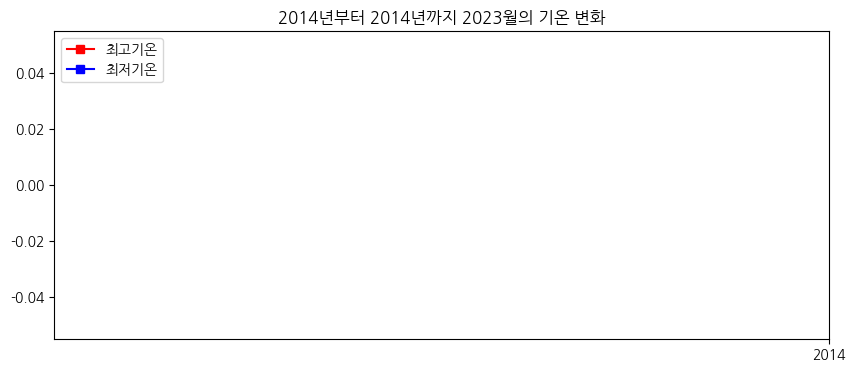

In [38]:
#2
import matplotlib.pyplot as plt
import koreanize_matplotlib


def	draw_two_plots(title,	x_data,	max_temp_list1,	label_y1,	max_temp_list2,	label_y2):
    plt.rcParams['axes.unicode_minus']	=	False		
    plt.figure(figsize=(10,	4))
    plt.plot(x_data,	max_temp_list1,	marker='s',	markersize=6,	color='r',	label=label_y1)
    plt.plot(x_data,	max_temp_list2,	marker='s',	markersize=6,	color='b',	label=label_y2)
    plt.xticks(x_data)		#	모든 xtick값을 출력함
    #plt.ylim(10,	40)
    plt.title(title)
    plt.legend(loc=2)
    plt.show()
    
def	main():
    first=int(input("시작 연도를 입력하세요 : "))
    second=int(input("마지막 연도를 입력하세요 : "))
    search_month =	int(input("기온 변화를 측정할 달을 입력하세요 :	"))
    weather_df =	pd.read_csv('daegu-utf8-df.csv',	encoding='utf-8-sig')
    weather_df['날짜']	=	pd.to_datetime(weather_df['날짜'],	format='%Y-%m-%d')
    first_decade_max_temp_list =	[0]	*	(second-first+1)		#	최고 기온 저장
    second_decade_max_temp_list =	[0]	*	(second-first+1)      #   최저 기온 저장
    first_decade =	first # 2014
    second_decade =	second # 2023
    
    for	year	in	range(second-first+1):
        first_decade_df =	weather_df[(weather_df['날짜'].dt.year ==	first_decade +	year)&(weather_df['날짜'].dt.month ==	search_month)]
        first_decade_max_temp_list[year]	=	round(first_decade_df['최고기온'].mean(),	1)
        second_decade_max_temp_list[year]	=	round(first_decade_df['최저기온'].mean(),	1)



    print(f'{search_month}월 최고 기온 평균:	{first_decade_max_temp_list}')
    print(f'{search_month}월 최저 기온 평균:	{second_decade_max_temp_list}')

    x_data =	[i for	i in	range(first,	second+1)]
    draw_two_plots(f'{first}년부터 {second}년까지 {search_month}월의 기온 변화',	x_data,
    first_decade_max_temp_list,	'최고기온',
    second_decade_max_temp_list,'최저기온')

main()

1월 최고 기온 평균:	[8.1, 6.8, 4.3, 6.3, 4.0, 7.3, 8.4, 5.9, 6.8, 6.7]
1월 최저 기온 평균:	[-1.7, -1.7, -4.2, -3.7, -5.2, -3.5, 0.1, -4.3, -4.1, -4.3]


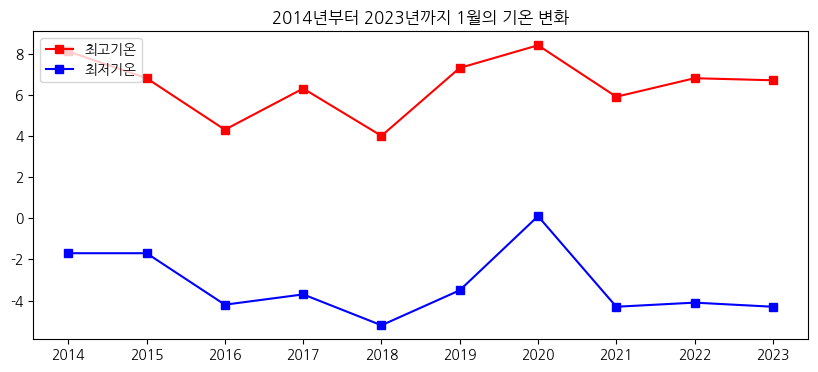

In [10]:
main()